In [1]:
dbUrl = "jdbc:sqlserver://114.55.148.101:1433;databaseName=jiaowu"
df = spark.read.jdbc(dbUrl,"view_stu_course_mark",properties={"user":"wangpeng","password":"wangpeng2018!*swjtudean"})

In [2]:
df.schema

StructType(List(StructField(student_id,StringType,true),StructField(course_code,StringType,true),StructField(course_name,StringType,true),StructField(speciality_code,StringType,true),StructField(mark,StringType,true),StructField(pmark,DoubleType,true)))

In [3]:
df.createOrReplaceTempView("mark")

In [4]:
data = spark.sql("select  * from mark where course_code='3223700' and speciality_code='0408' and student_id like '2014%'")

In [5]:
data.cache()

DataFrame[student_id: string, course_code: string, course_name: string, speciality_code: string, mark: string, pmark: double]

In [6]:
data.show(5)

+----------+-----------+-----------+---------------+----+-----+
|student_id|course_code|course_name|speciality_code|mark|pmark|
+----------+-----------+-----------+---------------+----+-----+
|2014112107|    3223700|      计算机网络|           0408|   5| 73.0|
|2014112108|    3223700|      计算机网络|           0408|  10| 94.0|
|2014112109|    3223700|      计算机网络|           0408|  10| 94.0|
|2014112110|    3223700|      计算机网络|           0408|   7| 80.0|
|2014112112|    3223700|      计算机网络|           0408|   5| 74.0|
+----------+-----------+-----------+---------------+----+-----+
only showing top 5 rows



In [7]:
from pyspark.sql.functions import *

In [12]:
down = data.sort(desc("pmark"))

In [18]:
marks = down.select('pmark')

In [19]:
ml = marks.collect()

In [20]:
y = [int(row['pmark']) for row in ml]
print(y)

[94, 94, 94, 93, 92, 91, 90, 89, 89, 89, 88, 87, 87, 85, 85, 83, 82, 82, 82, 82, 81, 81, 81, 81, 80, 80, 80, 79, 79, 79, 79, 78, 78, 78, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 75, 74, 74, 74, 74, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72, 71, 71, 71, 71, 71, 70, 70, 70, 70, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 66, 66, 66, 65, 64, 64, 64, 63, 63, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 55, 53, 53, 52, 31, 2]


In [16]:
import matplotlib.pyplot as plt

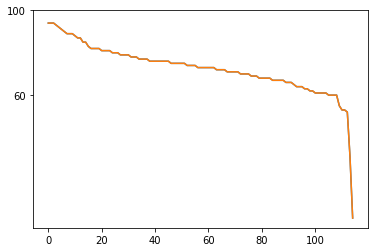

In [25]:
x = range(len(y))
plt.plot(x,y)
plt.yticks((60,100))
plt.show()